# Analizing the Property Data,

In [78]:
# Import the pandas
import pandas as pd

In [79]:
# First we are going to read the Data file
data = pd.read_csv('property-data.csv')

In [80]:
# here can see the rows and columns of our dataset we have
# there are 168446 Rows 
# and Total of 17 Columns
data.shape

(50000, 18)

In [81]:
# A little deep analysis for our available fields in the Data.
# Take note that we have date_added as an object which we have to convert to datetime.
# Also tow good fileds for Latitude and Longitute are available to check the location.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     50000 non-null  int64  
 1   property_id    50000 non-null  int64  
 2   location_id    50000 non-null  int64  
 3   page_url       50000 non-null  object 
 4   property_type  50000 non-null  object 
 5   price          50000 non-null  int64  
 6   location       50000 non-null  object 
 7   city           50000 non-null  object 
 8   province_name  50000 non-null  object 
 9   latitude       50000 non-null  float64
 10  longitude      50000 non-null  float64
 11  baths          50000 non-null  int64  
 12  area           50000 non-null  object 
 13  purpose        50000 non-null  object 
 14  bedrooms       50000 non-null  int64  
 15  date_added     50000 non-null  object 
 16  agency         36969 non-null  object 
 17  agent          36968 non-null  object 
dtypes: flo

In [82]:
# Notice that columns which are not important to us at this analysis so we are going to remove them.
# axis = 1 means we need to drop columns , inplcace True me we need to do it at orignal data not on copy.
data.drop(['page_url', 'agency', 'agent'], axis=1, inplace=True)

In [83]:
# One more important thing Always consider that our data should not contains the duplicate values.
# Our Analysis will no worth we analise one property twice.
data.duplicated('property_id').sum()

0

In [84]:
# Now we will check the numeric values a very quic way pandas offers us as 
# Here you can see the some statistic mean, count, min , maxium, Standard Divation and Quarntile 
data.describe()

# You can also use a parmeter all if you wnat to include the string columns in you analysis
# data.describe(include='all') 




,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms
count,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,84285.505460,1.559444e+07,4385.387820,1.783394e+07,29.849803,71.228597,2.870580,3.171580
std,48645.466685,2.261177e+06,3784.904713,3.551556e+07,3.810593,3.139740,2.262709,1.988884
min,0.000000,2.370620e+05,1.000000,0.000000e+00,24.749425,31.389173,0.000000,0.000000
25%,42012.250000,1.487266e+07,1058.000000,1.700000e+05,24.948476,67.129869,0.000000,2.000000
50%,84529.000000,1.666555e+07,3299.000000,8.500000e+06,31.459862,73.056182,3.000000,3.000000
75%,126491.500000,1.708708e+07,7220.000000,1.950000e+07,33.560992,73.238712,4.000000,4.000000
max,168443.000000,1.735771e+07,14199.000000,1.350000e+09,68.273802,74.499197,14.000000,68.000000


In [85]:
# Pandas magic command to show Correlation in data
data.corr()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms
Unnamed: 0,1.000000,0.831431,0.002431,-0.050814,0.004625,0.007716,-0.143011,-0.081392
property_id,0.831431,1.000000,0.012027,-0.034700,-0.014385,-0.006348,-0.111977,-0.070272
location_id,0.002431,0.012027,1.000000,-0.097980,-0.291084,-0.279736,-0.133907,-0.138949
price,-0.050814,-0.034700,-0.097980,1.000000,-0.074232,-0.022754,0.243451,0.306105
latitude,0.004625,-0.014385,-0.291084,-0.074232,1.000000,0.923986,0.052924,0.031473
longitude,0.007716,-0.006348,-0.279736,-0.022754,0.923986,1.000000,0.105940,0.079834
baths,-0.143011,-0.111977,-0.133907,0.243451,0.052924,0.105940,1.000000,0.722129
bedrooms,-0.081392,-0.070272,-0.138949,0.306105,0.031473,0.079834,0.722129,1.000000


In [86]:
# Humman brains are good at catagorise and compare so let us look some counts
# Here we can the the the properties for Rent and Sales are very different and we should consider them seperatly
data.purpose.value_counts()

For Sale    35730
For Rent    14270
Name: purpose, dtype: int64

In [87]:
# So now we understand that our dataset has two major classes Rent and Sale
# Here we are just wanted to confirm the 3 samples of each group under pupose tab Sales and Rent
data.groupby(['purpose']).sample(n=3, random_state=6)

,Unnamed: 0,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
42720,86873,16710953,3384,Upper Portion,50000,G-9,Islamabad,Islamabad Capital,33.682675,73.030243,4,1 Kanal,For Rent,4,6/20/2019
22539,100028,16900695,3337,Upper Portion,50000,G-13,Islamabad,Islamabad Capital,33.645957,72.962472,4,10 Marla,For Rent,3,6/27/2019
2579,41973,14850077,13172,Flat,36000,Malir,Karachi,Sindh,24.943317,67.179783,3,5.8 Marla,For Rent,2,6/27/2019
26122,145743,17236004,3351,House,19000000,G-15,Islamabad,Islamabad Capital,33.631915,72.929034,4,8 Marla,For Sale,4,7/11/2019
46590,122938,17069192,1796,House,22500000,Bahria Town,Lahore,Punjab,31.374414,74.177749,5,10 Marla,For Sale,5,7/2/2019
27309,95617,16844858,3041,House,52500000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.549693,73.130536,6,1 Kanal,For Sale,5,6/27/2019


In [88]:
# Now here we will look on 3 records of each purpose Category
# For Rent 3 properties and for For Sale 3 properties
data.groupby(['purpose']).sample(n=3, random_state=6)

,Unnamed: 0,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
42720,86873,16710953,3384,Upper Portion,50000,G-9,Islamabad,Islamabad Capital,33.682675,73.030243,4,1 Kanal,For Rent,4,6/20/2019
22539,100028,16900695,3337,Upper Portion,50000,G-13,Islamabad,Islamabad Capital,33.645957,72.962472,4,10 Marla,For Rent,3,6/27/2019
2579,41973,14850077,13172,Flat,36000,Malir,Karachi,Sindh,24.943317,67.179783,3,5.8 Marla,For Rent,2,6/27/2019
26122,145743,17236004,3351,House,19000000,G-15,Islamabad,Islamabad Capital,33.631915,72.929034,4,8 Marla,For Sale,4,7/11/2019
46590,122938,17069192,1796,House,22500000,Bahria Town,Lahore,Punjab,31.374414,74.177749,5,10 Marla,For Sale,5,7/2/2019
27309,95617,16844858,3041,House,52500000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.549693,73.130536,6,1 Kanal,For Sale,5,6/27/2019


In [89]:
# pandas groupby operations are very flexable and can perform the hevy lifting.
# here we are counting the Number 
data.groupby(['purpose', 'property_type'])['price'].count()

purpose   property_type
For Rent  Farm House          17
          Flat              3061
          House             5217
          Lower Portion     2415
          Penthouse           31
          Room               198
          Upper Portion     3331
For Sale  Farm House         183
          Flat              8264
          House            26100
          Lower Portion      324
          Penthouse           99
          Room                 7
          Upper Portion      753
Name: price, dtype: int64

In [90]:
# Properties with there purpose cities and types 
data.groupby(['purpose','city', 'property_type'])['price'].count()

purpose   city        property_type
For Rent  Faisalabad  Flat                 9
                      House              674
                      Lower Portion      105
                      Room                31
                      Upper Portion      253
          Islamabad   Farm House          13
                      Flat               928
                      House             2364
                      Lower Portion     1250
                      Penthouse            5
                      Room               103
                      Upper Portion     1652
          Karachi     Farm House           3
                      Flat              1759
                      House             1124
                      Lower Portion      519
                      Penthouse           26
                      Room                41
                      Upper Portion      716
          Rawalpindi  Farm House           1
                      Flat               365
                   

In [91]:
# The most expensive properties in both groups Sales and Rent
data.groupby(['purpose', 'property_type'])['price'].max() # You can also use min() here for minium proerties.

purpose   property_type
For Rent  Farm House          1050000
          Flat                 397000
          House               2500000
          Lower Portion       2280000
          Penthouse            900000
          Room                  90000
          Upper Portion        300000
For Sale  Farm House        800000000
          Flat              225000000
          House            1350000000
          Lower Portion      57000000
          Penthouse         150000000
          Room               90000000
          Upper Portion     110000000
Name: price, dtype: int64

<AxesSubplot:>

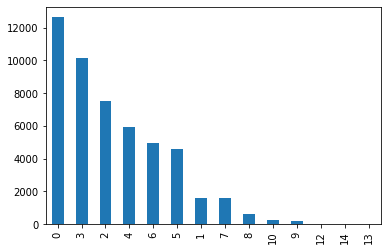

In [92]:
# some Charts
# basic charting in Pnadas are good enough for creating basic understanding.
# Some fancy options are also available like , Bokeh, Seaborn, Plotly and Altair
data.baths.value_counts().plot(kind='bar')

In [93]:
# To see only For Sale Properties.
df = data[data['purpose'] == 'For Sale']
df

,Unnamed: 0,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
1,92935,16807212,434,House,15500000,National Police Foundation,Islamabad,Islamabad Capital,33.700462,72.981226,6,10 Marla,For Sale,6,6/26/2019
2,91233,16784619,9996,House,7800000,Lalazaar Garden,Lahore,Punjab,31.509067,74.246771,3,3 Marla,For Sale,3,6/18/2019
5,33528,14207488,8141,House,4000000,Dheri Hassanabad,Rawalpindi,Punjab,33.573545,73.051143,5,4 Marla,For Sale,5,2/4/2019
7,74003,16332386,377,House,15000000,Samanabad,Lahore,Punjab,31.539206,74.305515,3,10.7 Marla,For Sale,7,6/3/2019
8,158911,17307101,681,Upper Portion,2100000,Liaquatabad,Karachi,Sindh,24.903253,67.052279,1,1.8 Marla,For Sale,1,7/17/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,152105,17273133,483,House,45000000,Izmir Town,Lahore,Punjab,31.423683,74.190931,5,1 Kanal,For Sale,5,7/13/2019
49994,58891,15792423,1014,House,9600000,Paragon City,Lahore,Punjab,31.534067,74.453945,4,5 Marla,For Sale,3,5/3/2019
49995,44198,15049114,1103,House,20700000,Lake City,Lahore,Punjab,31.359647,74.253073,0,10 Marla,For Sale,5,5/3/2019
49997,62774,15942743,1478,House,85000000,DHA Defence,Karachi,Sindh,24.842983,67.065697,0,1.4 Kanal,For Sale,0,6/25/2019


In [94]:
# We can see the proerties for sale by there room which is 3 rooms are the highiest
df.value_counts('bedrooms')

bedrooms
3     9362
5     5894
2     5846
4     5661
0     3904
6     2833
1      803
7      703
8      332
9      167
10     136
11      75
12       9
16       2
13       1
15       1
25       1
dtype: int64

In [95]:
# We can see the proerties for sale by there room which is 3 rooms are the highiest
df.groupby(['city', 'location', 'area'])['price'].mean()

city        location           area     
Faisalabad  204 Chak Road      5 Marla       9000000.0
            Abdullah City      5 Marla       8000000.0
            Abdullahpur        2.5 Marla     6500000.0
                               5 Marla       8500000.0
            Afghanabad         3.5 Marla     4200000.0
                                               ...    
Rawalpindi  Yousaf Colony      10 Marla     14000000.0
                               4 Marla       7750000.0
                               5 Marla       9250000.0
                               7 Marla      11000000.0
            Zafar ul Haq Road  2.5 Marla     8000000.0
Name: price, Length: 7039, dtype: float64

In [96]:
# Now we will see for Rent 
df = data[data['purpose'] == 'For Rent']

In [97]:
# The numper of rooms available for rent
df.value_counts('bedrooms')

bedrooms
3     4194
2     3313
0     2871
4     1341
5      951
6      656
1      528
7      150
8       87
9       74
10      49
11      46
12       2
14       2
28       2
13       1
15       1
25       1
68       1
dtype: int64

In [98]:
# Properties by Marla in Area and with there cities and locations.
df.groupby(['province_name','city', 'location', 'area'])['price'].count()

province_name      city       location         area     
Islamabad Capital  Islamabad  7th Avenue       1 Kanal      1
                                               1.1 Kanal    1
                                               1.3 Kanal    2
                                               10 Marla     1
                                               2 Kanal      1
                                                           ..
Sindh              Karachi    University Road  4.9 Marla    1
                                               7.8 Marla    1
                              Zamzama          1 Kanal      1
                                               1.6 Kanal    2
                                               14 Marla     3
Name: price, Length: 2625, dtype: int64

In [99]:
# Now we will see the same data but this time by Average of Prices
df.groupby(['province_name','city', 'location', 'area'])['price'].mean()
# df.sample(50)

province_name      city       location         area     
Islamabad Capital  Islamabad  7th Avenue       1 Kanal       400000.0
                                               1.1 Kanal     250000.0
                                               1.3 Kanal     197500.0
                                               10 Marla       50000.0
                                               2 Kanal      1000000.0
                                                              ...    
Sindh              Karachi    University Road  4.9 Marla      32000.0
                                               7.8 Marla      40000.0
                              Zamzama          1 Kanal       300000.0
                                               1.6 Kanal     422500.0
                                               14 Marla      265000.0
Name: price, Length: 2625, dtype: float64

In [100]:
df.groupby(['province_name','city', 'location', 'area'])['price'].mean()

province_name      city       location         area     
Islamabad Capital  Islamabad  7th Avenue       1 Kanal       400000.0
                                               1.1 Kanal     250000.0
                                               1.3 Kanal     197500.0
                                               10 Marla       50000.0
                                               2 Kanal      1000000.0
                                                              ...    
Sindh              Karachi    University Road  4.9 Marla      32000.0
                                               7.8 Marla      40000.0
                              Zamzama          1 Kanal       300000.0
                                               1.6 Kanal     422500.0
                                               14 Marla      265000.0
Name: price, Length: 2625, dtype: float64

In [103]:
df.sample(50)

,Unnamed: 0,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added
1777,62959,15944738,534,House,30000,Satiana Road,Faisalabad,Punjab,31.378610,73.129245,0,7.5 Marla,For Rent,0,4/17/2019
44261,149815,17257865,3047,Lower Portion,55000,Bahria Town Rawalpindi,Rawalpindi,Punjab,33.531951,73.115215,0,1 Kanal,For Rent,0,7/12/2019
33321,24619,13300246,343,House,400000,E-7,Islamabad,Islamabad Capital,33.727410,73.047585,0,1 Kanal,For Rent,7,12/6/2018
18825,69293,16172411,338,Flat,13000,Soan Garden,Islamabad,Islamabad Capital,33.564427,73.157101,2,3.4 Marla,For Rent,2,5/5/2019
7647,69734,16191175,11972,Upper Portion,38000,Bahria Town,Islamabad,Islamabad Capital,33.698472,73.223812,0,8 Marla,For Rent,0,6/29/2019
35800,36933,14503023,411,Flat,120000,Gulshan-e-Iqbal Town,Karachi,Sindh,24.877949,67.087927,4,10 Marla,For Rent,4,2/18/2019
32537,27236,13621667,8275,Room,10000,Defence View Society,Karachi,Sindh,24.834978,67.080260,0,0.5 Marla,For Rent,0,12/20/2018
44010,152479,17276367,3197,Upper Portion,44000,DHA Defence,Islamabad,Islamabad Capital,33.533668,73.146286,3,1 Kanal,For Rent,3,7/14/2019
47380,117421,17040264,6010,Upper Portion,13000,Dhok Paracha,Rawalpindi,Punjab,33.640455,73.084095,0,2 Marla,For Rent,1,7/2/2019
43449,84736,16672786,165,Upper Portion,100000,F-7,Islamabad,Islamabad Capital,33.720413,73.056493,2,1.3 Kanal,For Rent,2,6/13/2019
